In [1]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
import lightgbm as lgb

In [3]:
sys.path.insert(0,os.getcwd()+"/../../src/main")

In [4]:
!echo $LOCAL

/local/5190444


In [5]:
!mkdir $LOCAL/sandbox

In [6]:
HOME=os.environ['LOCAL']+"/sandbox"
os.chdir(HOME)
os.getcwd()

'/local/5190444/sandbox'

In [7]:
os.environ['LANLEP_HOME']=HOME

In [8]:
import data

In [9]:
!ls /home/lizhen09/lanlep2019/input/feat/*.parq | grep -v offset_.parq | xargs -L1  -IINPUT cp INPUT {HOME}/input/feat/

In [10]:
!cp /home/lizhen09/lanlep2019/input/feat/*.pkl {HOME}/input/feat/

In [11]:
reload (data)

<module 'data' from '/home/lizhen09/mydev/lanlep2019/notebook/2/../../src/main/data.pyc'>

In [12]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['fwv']
    traintest = data.TrainTest('coverage', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [13]:
traintest.num_dataset()

5

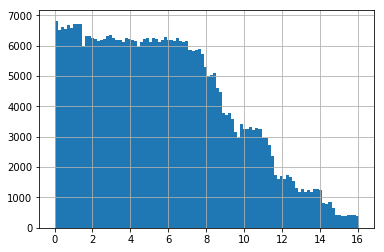

In [14]:
traintest.ydf.hist(bins=100);

In [15]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.0299900335398275

## no rm

In [16]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 100)

In [17]:
datadf=pd.concat([traintest.traindf, traintest.ydf],axis=1)
print datadf.shape
datadf.head()

(419359, 101)


fwv_0     fwv_1     fwv_2     fwv_3     fwv_4  \
index                                                                  
quake_14_o38092704  0.059493  0.288745  0.175394 -0.306433  0.127363   
quake_05_o21076314  0.193220  0.223538  0.108353 -0.108521  0.048008   
quake_09_o34152517  0.195538  0.221066  0.115602 -0.111520  0.071273   
quake_07_o29907005  0.120579  0.257296  0.096898 -0.180808  0.078737   
quake_03_o11370843  0.219481  0.194752  0.059049 -0.080931  0.064311   

                       fwv_5     fwv_6     fwv_7     fwv_8     fwv_9  ...  \
index                                                                 ...   
quake_14_o38092704  0.078662  0.099293  0.320627  0.193841 -0.237509  ...   
quake_05_o21076314 -0.075768  0.018792  0.188903  0.167017 -0.079257  ...   
quake_09_o34152517 -0.085213 -0.029911  0.200946  0.154639 -0.073049  ...   
quake_07_o29907005 -0.026547  0.014643  0.191294  0.165722 -0.116214  ...   
quake_03_o11370843 -0.142953 -0.051948  0.098170  0.169367  0.026442  ...   

                      fwv_91    fwv_92    fwv_93    fwv_94    fwv_95  \
index                                                                  
quake_14_o38092704  0.119633  0.019761  0.043149  0.216871  0.032755   
quake_05_o21076314  0.173315  0.101008  0.032328  0.010907  0.033171   
quake_09_o34152517  0.195082  0.087095  0.034098 -0.026654  0.023064   
quake_07_o29907005  0.154124  0.055500  0.069783  0.097929  0.058242   
quake_03_o11370843  0.203573  0.129579  0.062429 -0.040362  0.015726   

                      fwv_96    fwv_97    fwv_98    fwv_99         y  
index                                                                 
quake_14_o38092704  0.095359 -0.141673 -0.095935  0.154893  4.818398  
quake_05_o21076314  0.027125 -0.087466 -0.007180  0.079947  2.541899  
quake_09_o34152517  0.001101 -0.098248  0.031839  0.082902  0.727197  
quake_07_o29907005  0.032560 -0.102489 -0.025202  0.069889  8.299899  
quake_03_o11370843  0.013697 -0.070627  0.042443 -0.026576  5.864797  

[5 rows x 101 columns]

In [18]:
datadf= datadf[~datadf.index.duplicated(keep='first')]
datadf.shape

(419248, 101)

In [19]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                    
quake_14_o38092704     14
quake_05_o21076314      5
quake_09_o34152517      9
quake_07_o29907005      7
quake_03_o11370843      3

In [20]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3766  29606  36381  22721  32572  20661  18112  41320  20285  24722   

          10     11     12     13     14     15    16  
index  29316  28282  22648  21974  37848  24269  4765

In [21]:
qdf=qdf[~qdf['index'].isin({0,16})]
datadf=datadf.loc[qdf.index]
ydf=datadf['y']
datadf=datadf.drop('y',axis=1)
qdf.shape,datadf.shape,ydf.shape

((410717, 1), (410717, 100), (410717,))

In [22]:
qlen=qdf['index'].value_counts().to_dict()
str(qlen)

'{1: 29606, 2: 36381, 3: 22721, 4: 32572, 5: 20661, 6: 18112, 7: 41320, 8: 20285, 9: 24722, 10: 29316, 11: 28282, 12: 22648, 13: 21974, 14: 37848, 15: 24269}'

In [23]:
quakes=set(qdf['index'])
quakes

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [24]:
import utils
n_thread= utils.get_num_thread()
n_thread

11

In [62]:
def topn(testv,n,trainX):
    assert n>0
    testv=testv.reshape((1,-1))
    delta =trainX-testv
    delta=np.sqrt(np.sum(delta*delta,1))
    aindex=np.argsort(delta) 
    return list(aindex[:n]),list(delta[aindex[:n]])
    

In [63]:
testX=testdf.values
testX.shape

(2624, 100)

In [64]:
trainX=datadf.values
trainX.shape, qdf.shape

((410717, 100), (410717, 1))

In [70]:
%%time
topidxs  = []
topdistances=[]
for testv in testX:
    a = topn(testv,3000,trainX)
    topidxs += a[0]
    topdistances+=a[1]

CPU times: user 54min 46s, sys: 7min 14s, total: 1h 2min
Wall time: 5min 41s


In [71]:
len(topidxs),len(set(topidxs)),len(testX),len(topidxs)/len(testX)

(7872000, 347287, 2624, 3000)

In [72]:
a=qdf.iloc[topidxs]
a['index'].value_counts().sort_values().to_frame().T

12      3       2       13      11      8       9       4       5   \
index  106298  106863  111123  180795  207433  218241  270842  283817  292275   

           1       6       10       7        15       14  
index  434542  446517  518211  1422904  1498771  1773368

In [73]:
b=ydf.iloc[topidxs]

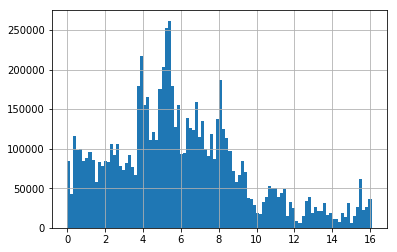

In [74]:
b.hist(bins=100);

In [45]:
c=pd.concat([a,b],axis=1)

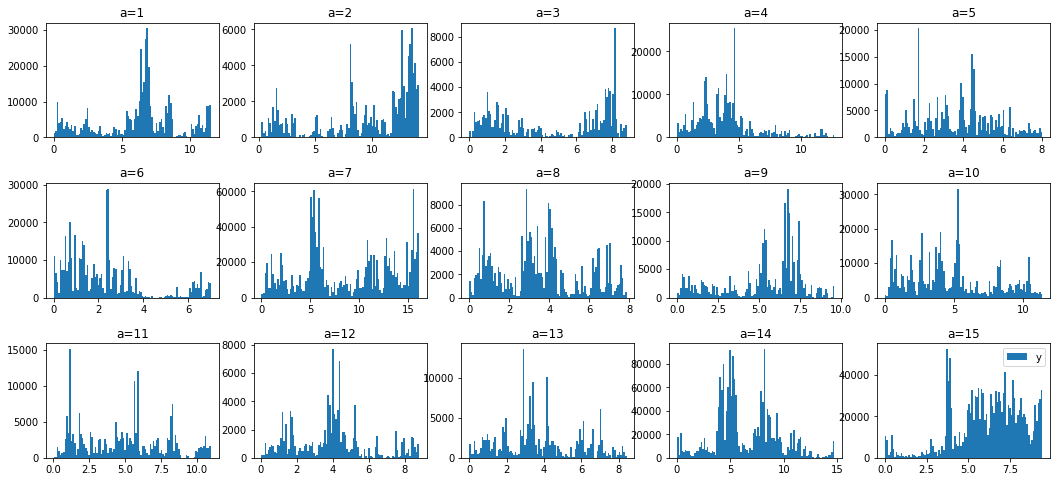

In [56]:
grouped = c.reset_index(drop=True).groupby('index')
rowlength = grouped.ngroups/3                         # fix up if odd number of groups
fig, axs = plt.subplots(figsize=(18,8), 
                        nrows=3, ncols=rowlength,     # fix as above
                        gridspec_kw=dict(hspace=0.4)) # Much control of gridspec

targets = zip(grouped.groups.keys(), axs.flatten())
for i, (key, ax) in enumerate(targets):
    ax.hist(grouped.get_group(key)['y'],bins=100)
    ax.set_title('a=%d'%key)
ax.legend()
plt.show()

In [60]:
idxdf=pd.DataFrame(np.array(qdf.iloc[topidxs].values).reshape([-1,len(testX)],order='F'))
print idxdf.shape
idxdf.head()

(3000, 2624)


0     1     2     3     4     5     6     7     8     9     ...  2614  \
0     7    14    13     4     7     9    14     8     9     7  ...    15   
1     7    14    13     4     7     9     7    10     5     7  ...    15   
2     7    14    13     4     7     9    14    13    10     7  ...    15   
3     7    14    13     4     7     9    14    10     3    14  ...    15   
4     7    14    13     4    15     9    14    13     9     7  ...    15   

   2615  2616  2617  2618  2619  2620  2621  2622  2623  
0    14    14    15    15    11    15    15     8    15  
1    14    14    15    15    15    15    15     8    15  
2    14    10    15     1    11    15    15     8    15  
3    14    10    15     1     1    15    15     8     1  
4    14     1    15     1    12    15    15     8    15  

[5 rows x 2624 columns]

In [61]:
yidxdf=pd.DataFrame(np.array(ydf.iloc[topidxs].values).reshape([-1,len(testX)],order='F'))
print yidxdf.shape
yidxdf.head()

(3000, 2624)


0         1         2         3          4         5         6     \
0  5.352598  8.147598  3.130096  4.021399  15.626495  0.281398  8.401898   
1  5.352600  8.146496  3.131199  4.020396  15.626496  0.281396  5.289796   
2  5.398296  8.147597  3.147099  4.020398  15.628596  0.280298  4.102300   
3  5.352599  8.149696  3.132198  4.020397  15.625398  0.282497  4.110798   
4  5.397297  8.148698  3.132196  4.021397   8.556200  0.281396  4.108698   

       7         8         9     ...      2614      2615      2616      2617  \
0  1.067297  0.622897  5.303598  ...  7.645396  4.364097  9.144599  7.646497   
1  3.452899  1.311897  5.303596  ...  7.264499  4.367198  8.801996  7.644397   
2  4.088697  3.884897  5.302599  ...  7.644397  4.359799  3.829497  7.645396   
3  3.204999  0.468200  4.005498  ...  7.644397  4.361900  3.830596  7.648596   
4  4.088697  0.622897  5.302597  ...  7.265597  4.362997  6.152699  7.642197   

       2618      2619      2620      2621      2622      2623  
0  5.550399  3.952899  6.717599  5.837699  4.234899  5.897298  
1  5.551499  2.387197  6.817696  5.837697  4.234898  5.897297  
2  6.402696  3.955997  6.817696  5.837697  4.231696  5.896198  
3  6.402699  4.874799  6.714397  6.517597  4.231696  6.406999  
4  6.403796  2.680297  6.816597  6.517599  4.230596  5.896199  

[5 rows x 2624 columns]

In [80]:
disdf=pd.DataFrame(np.array(topdistances).reshape([-1,len(testX)],order='F')).round(2)
print disdf.shape
disdf.head()

(3000, 2624)


0     1     2     3     4     5     6     7     8     9     ...  2614  \
0  0.13  0.14  0.11  0.13  0.14  0.14  0.14  0.13  0.12  0.14  ...  0.14   
1  0.13  0.14  0.12  0.13  0.14  0.14  0.14  0.14  0.12  0.14  ...  0.14   
2  0.13  0.14  0.12  0.13  0.14  0.14  0.14  0.14  0.12  0.15  ...  0.15   
3  0.13  0.14  0.12  0.13  0.14  0.14  0.14  0.14  0.13  0.15  ...  0.15   
4  0.13  0.14  0.12  0.13  0.14  0.14  0.15  0.14  0.13  0.15  ...  0.15   

   2615  2616  2617  2618  2619  2620  2621  2622  2623  
0  0.14  0.15  0.15  0.14  0.15  0.13  0.13  0.12  0.14  
1  0.14  0.15  0.15  0.14  0.15  0.13  0.13  0.12  0.14  
2  0.14  0.15  0.15  0.14  0.15  0.13  0.13  0.12  0.15  
3  0.14  0.15  0.15  0.14  0.15  0.14  0.13  0.13  0.15  
4  0.14  0.15  0.15  0.15  0.15  0.14  0.13  0.13  0.15  

[5 rows x 2624 columns]

In [85]:
disdf0=disdf

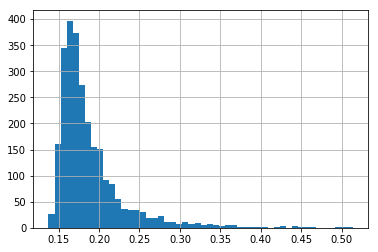

In [82]:
disdf.mean().hist(bins=50);

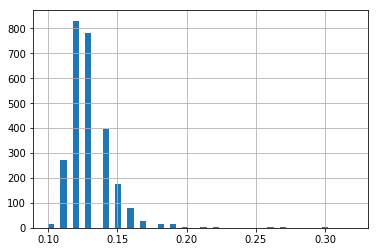

In [83]:
disdf.min().hist(bins=50);

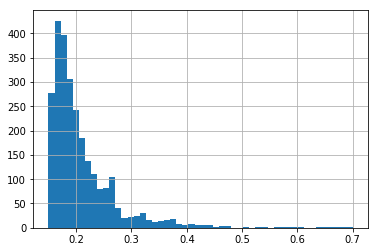

In [84]:
disdf.max().hist(bins=50);

## left [3,5,6,8,12,13]

In [86]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 100)

In [87]:
datadf=pd.concat([traintest.traindf, traintest.ydf],axis=1)
print datadf.shape
datadf.head()

(419359, 101)


fwv_0     fwv_1     fwv_2     fwv_3     fwv_4  \
index                                                                  
quake_14_o38092704  0.059493  0.288745  0.175394 -0.306433  0.127363   
quake_05_o21076314  0.193220  0.223538  0.108353 -0.108521  0.048008   
quake_09_o34152517  0.195538  0.221066  0.115602 -0.111520  0.071273   
quake_07_o29907005  0.120579  0.257296  0.096898 -0.180808  0.078737   
quake_03_o11370843  0.219481  0.194752  0.059049 -0.080931  0.064311   

                       fwv_5     fwv_6     fwv_7     fwv_8     fwv_9  ...  \
index                                                                 ...   
quake_14_o38092704  0.078662  0.099293  0.320627  0.193841 -0.237509  ...   
quake_05_o21076314 -0.075768  0.018792  0.188903  0.167017 -0.079257  ...   
quake_09_o34152517 -0.085213 -0.029911  0.200946  0.154639 -0.073049  ...   
quake_07_o29907005 -0.026547  0.014643  0.191294  0.165722 -0.116214  ...   
quake_03_o11370843 -0.142953 -0.051948  0.098170  0.169367  0.026442  ...   

                      fwv_91    fwv_92    fwv_93    fwv_94    fwv_95  \
index                                                                  
quake_14_o38092704  0.119633  0.019761  0.043149  0.216871  0.032755   
quake_05_o21076314  0.173315  0.101008  0.032328  0.010907  0.033171   
quake_09_o34152517  0.195082  0.087095  0.034098 -0.026654  0.023064   
quake_07_o29907005  0.154124  0.055500  0.069783  0.097929  0.058242   
quake_03_o11370843  0.203573  0.129579  0.062429 -0.040362  0.015726   

                      fwv_96    fwv_97    fwv_98    fwv_99         y  
index                                                                 
quake_14_o38092704  0.095359 -0.141673 -0.095935  0.154893  4.818398  
quake_05_o21076314  0.027125 -0.087466 -0.007180  0.079947  2.541899  
quake_09_o34152517  0.001101 -0.098248  0.031839  0.082902  0.727197  
quake_07_o29907005  0.032560 -0.102489 -0.025202  0.069889  8.299899  
quake_03_o11370843  0.013697 -0.070627  0.042443 -0.026576  5.864797  

[5 rows x 101 columns]

In [88]:
datadf= datadf[~datadf.index.duplicated(keep='first')]
datadf.shape

(419248, 101)

In [89]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                    
quake_14_o38092704     14
quake_05_o21076314      5
quake_09_o34152517      9
quake_07_o29907005      7
quake_03_o11370843      3

In [90]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3766  29606  36381  22721  32572  20661  18112  41320  20285  24722   

          10     11     12     13     14     15    16  
index  29316  28282  22648  21974  37848  24269  4765

In [91]:
qdf=qdf[qdf['index'].isin(set( [3,5,6,8,12,13]))]
datadf=datadf.loc[qdf.index]
ydf=datadf['y']
datadf=datadf.drop('y',axis=1)
qdf.shape,datadf.shape,ydf.shape

((126401, 1), (126401, 100), (126401,))

In [92]:
qlen=qdf['index'].value_counts().to_dict()
str(qlen)

'{3: 22721, 5: 20661, 6: 18112, 8: 20285, 12: 22648, 13: 21974}'

In [93]:
quakes=set(qdf['index'])
quakes

{3, 5, 6, 8, 12, 13}

In [94]:
import utils
n_thread= utils.get_num_thread()
n_thread

11

In [95]:
def topn(testv,n,trainX):
    assert n>0
    testv=testv.reshape((1,-1))
    delta =trainX-testv
    delta=np.sqrt(np.sum(delta*delta,1))
    aindex=np.argsort(delta) 
    return list(aindex[:n]),list(delta[aindex[:n]])
    

In [96]:
testX=testdf.values
testX.shape

(2624, 100)

In [97]:
trainX=datadf.values
trainX.shape, qdf.shape

((126401, 100), (126401, 1))

In [98]:
%%time
topidxs  = []
topdistances=[]
for testv in testX:
    a = topn(testv,3000,trainX)
    topidxs += a[0]
    topdistances+=a[1]

CPU times: user 16min 15s, sys: 8.8 s, total: 16min 24s
Wall time: 1min 34s


In [99]:
len(topidxs),len(set(topidxs)),len(testX),len(topidxs)/len(testX)

(7872000, 114050, 2624, 3000)

In [100]:
a=qdf.iloc[topidxs]
a['index'].value_counts().sort_values().to_frame().T

12      3        13       8        5        6 
index  373425  425994  1003640  1113316  1544222  3411403

In [101]:
b=ydf.iloc[topidxs]

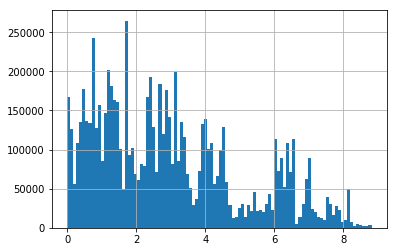

In [102]:
b.hist(bins=100);

In [103]:
c=pd.concat([a,b],axis=1)

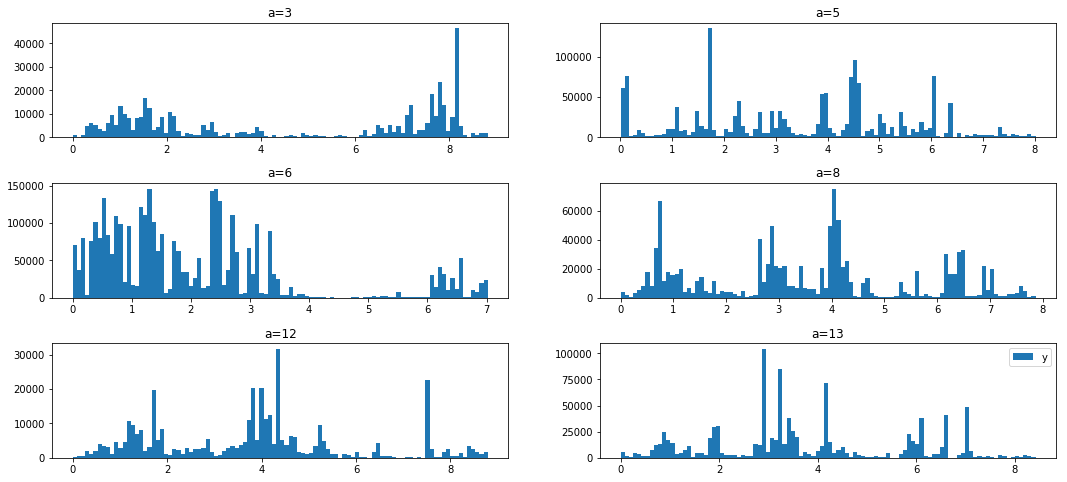

In [104]:
grouped = c.reset_index(drop=True).groupby('index')
rowlength = grouped.ngroups/3                         # fix up if odd number of groups
fig, axs = plt.subplots(figsize=(18,8), 
                        nrows=3, ncols=rowlength,     # fix as above
                        gridspec_kw=dict(hspace=0.4)) # Much control of gridspec

targets = zip(grouped.groups.keys(), axs.flatten())
for i, (key, ax) in enumerate(targets):
    ax.hist(grouped.get_group(key)['y'],bins=100)
    ax.set_title('a=%d'%key)
ax.legend()
plt.show()

In [105]:
idxdf=pd.DataFrame(np.array(qdf.iloc[topidxs].values).reshape([-1,len(testX)],order='F'))
print idxdf.shape
idxdf.head()

(3000, 2624)


0     1     2     3     4     5     6     7     8     9     ...  2614  \
0     6     6    13     6     8     6     6     8     5     6  ...     6   
1     6     6    13     6     8     6     6    13     3     6  ...     6   
2     6     6    13     6     8     6     6    13     3     6  ...     6   
3     6     6    13     6     8     6     6    13     5     6  ...     6   
4     6     6    13     6     8     6     6    13     5     6  ...     6   

   2615  2616  2617  2618  2619  2620  2621  2622  2623  
0     5    12     6     6    12     5     5     8     6  
1     5     6     6     6    12     5     5     8     6  
2     5    13     6     6    12     5     5     8     6  
3     5    12     6     6    12     5     5     8     6  
4     5    12     6     6    12     5     5     8     6  

[5 rows x 2624 columns]

In [106]:
yidxdf=pd.DataFrame(np.array(ydf.iloc[topidxs].values).reshape([-1,len(testX)],order='F'))
print yidxdf.shape
yidxdf.head()

(3000, 2624)


0         1         2         3         4         5         6     \
0  2.347699  2.427498  3.130096  0.422897  7.029997  0.273899  0.758100   
1  0.948500  2.427498  3.131199  1.264498  7.030996  0.272899  0.763400   
2  0.948500  2.359400  3.147099  0.424996  7.027797  0.273896  0.763396   
3  0.946398  2.360398  3.132198  0.420796  7.029998  0.274996  0.758098   
4  2.339198  2.359398  3.132196  1.753998  7.025698  0.276096  0.777199   

       7         8         9     ...      2614      2615      2616      2617  \
0  1.067297  1.311897  0.777196  ...  0.077097  1.749198  1.692896  0.075000   
1  4.088697  0.468200  0.773998  ...  0.087698  1.748199  1.886999  0.074998   
2  4.088697  0.469297  0.768696  ...  0.077098  1.749198  1.808597  0.078197   
3  2.006500  1.311900  0.772999  ...  0.075000  1.751396  1.688698  0.075997   
4  2.009698  1.312997  0.778296  ...  0.078197  1.748200  4.026197  0.075999   

       2618      2619      2620      2621      2622      2623  
0  2.498799  2.680297  4.469900  4.462396  4.234899  2.512597  
1  2.512597  2.682400  4.470896  4.465598  4.234898  3.339296  
2  1.340096  2.672796  4.470897  4.461398  4.231696  3.338198  
3  2.510498  2.680296  4.470896  4.461396  4.231696  3.338199  
4  2.510499  2.670696  4.468797  4.462396  4.230596  3.337199  

[5 rows x 2624 columns]

In [107]:
disdf=pd.DataFrame(np.array(topdistances).reshape([-1,len(testX)],order='F')).round(2)
print disdf.shape
disdf.head()

(3000, 2624)


0     1     2     3     4     5     6     7     8     9     ...  2614  \
0  0.15  0.19  0.11  0.14  0.15  0.18  0.15  0.13  0.12  0.18  ...  0.21   
1  0.15  0.20  0.12  0.14  0.15  0.18  0.15  0.14  0.13  0.18  ...  0.22   
2  0.15  0.20  0.12  0.14  0.16  0.18  0.15  0.14  0.13  0.18  ...  0.22   
3  0.15  0.20  0.12  0.14  0.16  0.18  0.16  0.14  0.13  0.18  ...  0.22   
4  0.15  0.20  0.12  0.15  0.16  0.19  0.16  0.14  0.13  0.18  ...  0.22   

   2615  2616  2617  2618  2619  2620  2621  2622  2623  
0  0.19  0.16  0.19  0.21  0.15  0.26  0.13  0.12   0.2  
1  0.20  0.16  0.20  0.21  0.15  0.27  0.14  0.12   0.2  
2  0.20  0.16  0.20  0.21  0.15  0.27  0.14  0.12   0.2  
3  0.20  0.16  0.20  0.21  0.16  0.27  0.14  0.13   0.2  
4  0.20  0.16  0.20  0.21  0.16  0.28  0.14  0.13   0.2  

[5 rows x 2624 columns]

In [108]:
disdf35681113=disdf

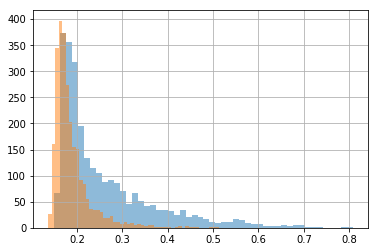

In [129]:
disdf.mean().hist(bins=50,alpha=0.5);
disdf0.mean().hist(bins=50,alpha=0.5);


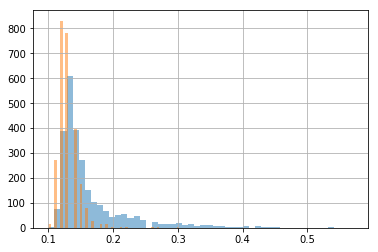

In [130]:
disdf.min().hist(bins=50,alpha=0.5);
disdf0.min().hist(bins=50,alpha=0.5);


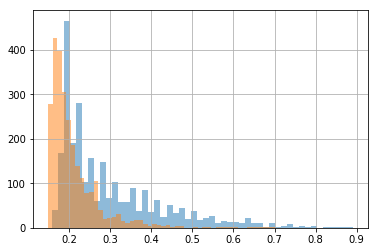

In [131]:
disdf.max().hist(bins=50,alpha=0.5);
disdf0.max().hist(bins=50,alpha=0.5);


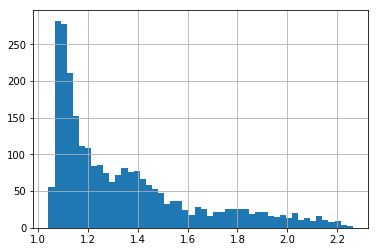

In [123]:
d=disdf35681113.mean(0)/disdf0.mean(0)
d.hist(bins=50);

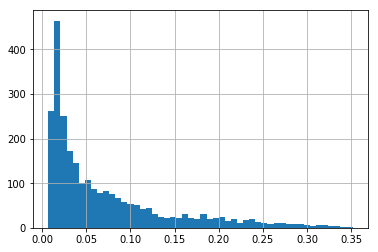

In [124]:
d=disdf35681113.mean(0)-disdf0.mean(0)
d.hist(bins=50);